In [1]:
from google.colab import files
uploaded =files.upload()

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv


In [6]:
import pandas as pd
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
print(df)
print(df.columns)

            STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50         

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [8]:
print(df.columns)

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


In [9]:
import pandas as pd
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
print(df.head(25))

          STATE/UT           DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0   ANDHRA PRADESH           ADILABAD  2001     101                 60   
1   ANDHRA PRADESH          ANANTAPUR  2001     151                125   
2   ANDHRA PRADESH           CHITTOOR  2001     101                 57   
3   ANDHRA PRADESH           CUDDAPAH  2001      80                 53   
4   ANDHRA PRADESH      EAST GODAVARI  2001      82                 67   
5   ANDHRA PRADESH      GUNTAKAL RLY.  2001       3                  1   
6   ANDHRA PRADESH             GUNTUR  2001     182                 88   
7   ANDHRA PRADESH     HYDERABAD CITY  2001     111                113   
8   ANDHRA PRADESH         KARIMNAGAR  2001     162                 85   
9   ANDHRA PRADESH            KHAMMAM  2001      93                 60   
10  ANDHRA PRADESH            KRISHNA  2001      65                 51   
11  ANDHRA PRADESH            KURNOOL  2001     133                 72   
12  ANDHRA PRADESH      MAHABOOBNAGAR 

In [10]:
unique_states=df["STATE/UT"].unique()
print("unique state/UTs:")
print(unique_states)

unique state/UTs:
['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']


In [11]:
print("Missing values before cleaning:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0

In [12]:
df.rename(columns={"STATE/UT":'state',"YEAR":"year","TOTAL IPC CRIMES":"Crime_Count"},inplace=True)
print(df.columns)

Index(['state', 'DISTRICT', 'year', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'Crime_Count'],
      dtype='object')


In [13]:
df["state"]=df["state"].str.strip()
df.drop_duplicates(inplace=True)
df=df[["state","year","Crime_Count"]]
print(df)

               state  year  Crime_Count
0     ANDHRA PRADESH  2001         4154
1     ANDHRA PRADESH  2001         4125
2     ANDHRA PRADESH  2001         5818
3     ANDHRA PRADESH  2001         3140
4     ANDHRA PRADESH  2001         6507
...              ...   ...          ...
9012     LAKSHADWEEP  2012           60
9013     LAKSHADWEEP  2012           60
9014      PUDUCHERRY  2012          787
9015      PUDUCHERRY  2012         3494
9016      PUDUCHERRY  2012         4281

[9017 rows x 3 columns]


In [14]:
df.head(28)

,state,year,Crime_Count
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507
5,ANDHRA PRADESH,2001,287
6,ANDHRA PRADESH,2001,7848
7,ANDHRA PRADESH,2001,11831
8,ANDHRA PRADESH,2001,5811
9,ANDHRA PRADESH,2001,4582


In [16]:
df.tail(100)

,state,year,Crime_Count
8917,UTTAR PRADESH,2012,775
8918,UTTAR PRADESH,2012,3652
8919,UTTAR PRADESH,2012,3715
8920,UTTAR PRADESH,2012,1765
8921,UTTAR PRADESH,2012,2296
...,...,...,...
9012,LAKSHADWEEP,2012,60
9013,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,2012,787
9015,PUDUCHERRY,2012,3494


In [17]:
crime_count_by_state=df.groupby(["state","year"])["Crime_Count"].sum().sort_values(ascending=False)
print(crime_count_by_state)

state           year
MADHYA PRADESH  2012    440670
                2011    434188
                2010    428538
MAHARASHTRA     2010    416336
MADHYA PRADESH  2009    415524
                         ...  
LAKSHADWEEP     2011        88
                2010        84
                2005        84
                2001        72
                2003        62
Name: Crime_Count, Length: 420, dtype: int64


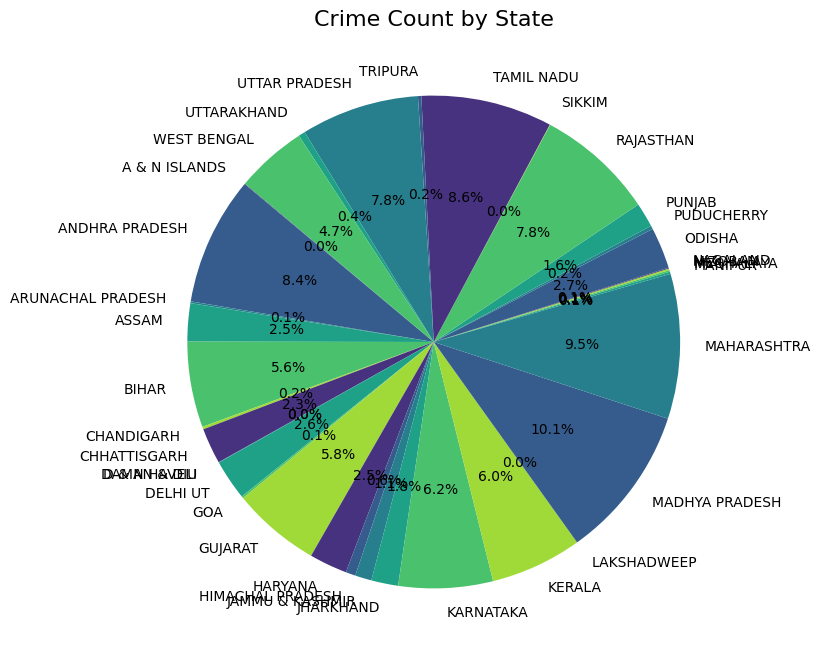

In [23]:
# Calculate the total crime count for each state
state_crime_rate = df.groupby('state')['Crime_Count'].sum()

plt.figure(figsize=(10, 8))
plt.pie(state_crime_rate.values, labels=state_crime_rate.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Crime Count by State", fontsize=16)
plt.show()

In [ ]:
+
